In [1]:
import numpy as np
import numpy

import matplotlib.pyplot as plt
import h5py
%matplotlib inline

from jax import numpy as jnp


import csiborgtools

%load_ext autoreload
%autoreload 2

In [2]:
# fpath = "/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_los/los_A2_csiborg1.hdf5"

fpath_data = "/mnt/extraspace/rstiskalek/catalogs/PV_Supranta/A2.h5"

paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)
# nsims = paths.get_ics("csiborg1")

In [3]:
loader = csiborgtools.flow.DataLoader("csiborg1", "A2", fpath_data, paths)

16:18:41: reading the catalogue.
<KeysViewHDF5 ['DEC', 'RA', 'e_rhMpc', 'r_hMpc', 'z_obs']>
16:18:41: reading the interpolated field.


100%|██████████| 101/101 [00:16<00:00,  6.23it/s]


16:18:58: calculating the radial velocity.


100%|██████████| 452/452 [00:01<00:00, 282.72it/s]


In [4]:
f = csiborgtools.flow.LOSInterpolator(loader.rdist, loader.los_density)

In [9]:
from jax import jit

fjit = jit(f)

In [20]:
x = jnp.array([23., 4., -3., 4.0])

In [32]:
fjit(x, 0, 4)

Array([13.325991,  7.485718,       nan,  7.485718], dtype=float32)

In [71]:
from scipy.interpolate import interp1d

In [77]:
f = interp1d(loader.rdist, loader.los_density[0, 0, :], kind='cubic')

In [84]:
x = np.linspace(0.1, 100)

In [85]:
%timeit f(x)

30.1 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [38]:
loader.los_radial_velocity.shape

(452, 101, 2000)

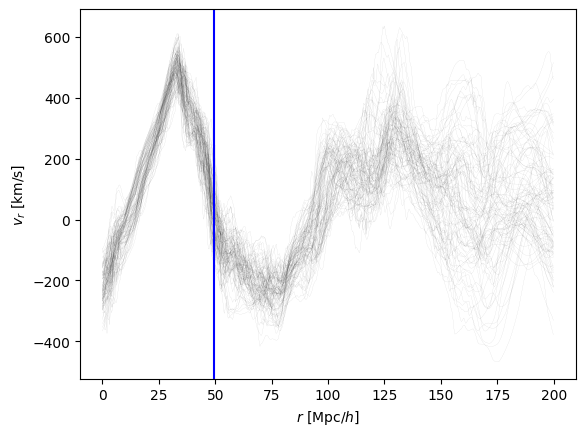

In [73]:
k = 40

plt.figure()
for i in range(101):
    plt.plot(loader.rdist, loader.los_radial_velocity[k, i, :], c="k", alpha=0.25, lw=0.1)

# plt.plot(loader.rdist, np.median(loader.los_radial_velocity[k, :, :], axis=0), c="r")

plt.axvline(loader.cat["rdist"][k], c="b")
# plt.axvline(r_object[k] - err_object[k], c="b", ls="--")
# plt.axvline(r_object[k] + err_object[k], c="b", ls="--")


# plt.ylim(1)

# plt.yscale("log")

plt.xlabel(r"$r ~ [\mathrm{Mpc} / h]$")
plt.ylabel(r"$v_r ~ [\mathrm{km} / \mathrm{s}]$")
# plt.savefig("../plots/radial_velocity_example.png", dpi=300)
plt.show()


In [75]:
csiborgtools.flow.dist2redshift

[autoreload of csiborgtools.flow failed: Traceback (most recent call last):
  File "/mnt/users/rstiskalek/csiborgtools/venv_csiborg/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/mnt/users/rstiskalek/csiborgtools/venv_csiborg/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/usr/local/shared/python/3.11.7/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/mnt/users/rstiskalek/csiborgtools/csiborgtools/flow/__init__.py", line 16, in <module>
    from .flow_model import DataLoader, radial_velocity_los, dist2redshift  # noqa
    ^^^^^^^^^^

AttributeError: module 'csiborgtools.flow' has no attribute 'dist2redshift'

In [20]:
Omega_m = 0.307


from astropy.cosmology import FlatLambdaCDM 
from astropy.cosmology.units import redshift_distance
from astropy import units as u
import astropy.cosmology.units as cu
cosmo = FlatLambdaCDM(H0=100, Om0=Omega_m)

In [4]:
csiborgtools.flow.dist2redshift(1, Omega_m)

0.0003335897179016943

In [16]:
redshift_distance(cosmo, "comoving")

Equivalency([(Unit("redshift"),
              Unit("Mpc"),
              <function astropy.cosmology.units.redshift_distance.<locals>.z_to_distance(z)>,
              <function astropy.cosmology.units.redshift_distance.<locals>.distance_to_z(d)>)])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


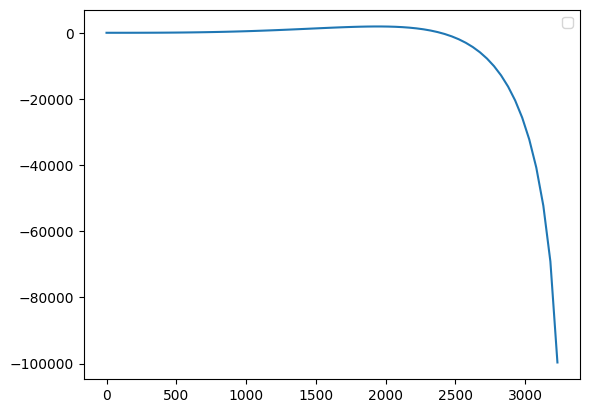

In [50]:
plt.figure()
plt.plot(rdist, (zfull - zapprox) * 299792.458)
# plt.plot(rdist, zapprox, label="Approx")

plt.legend()


plt.show()